In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem.wordnet import WordNetLemmatizer # Import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('/content/245_1 (2).csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

In [4]:
df.isnull().sum()

,0
id,0
brand,0
categories,0
dateAdded,0
dateUpdated,0
ean,31979
keys,0
manufacturer,141
manufacturerNumber,203
name,0


In [5]:
df.shape

(71044, 25)

In [6]:
df = df[['brand', 'manufacturer', 'reviews.didPurchase', 'reviews.rating', 'reviews.text']]

In [7]:
df.head()

,brand,manufacturer,reviews.didPurchase,reviews.rating,reviews.text
0,Universal Music,Universal Music Group / Cash Money,NaN,5,i love this album. it's very good. more to the...
1,Lundberg,Lundberg,True,5,Good flavor. This review was collected as part...
2,Lundberg,Lundberg,True,5,Good flavor.
3,K-Y,K-Y,False,1,I read through the reviews on here before look...
4,K-Y,K-Y,False,1,My husband bought this gel for us. The gel cau...


In [8]:
df.isnull().sum()

,0
brand,0
manufacturer,141
reviews.didPurchase,38886
reviews.rating,0
reviews.text,36


In [9]:
df['reviews.didPurchase'] = df['reviews.didPurchase'].fillna('Not Available')
df = df.dropna()


<ipython-input-9-92d869dd5149>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews.didPurchase'] = df['reviews.didPurchase'].fillna('Not Available')


In [10]:
df.isnull().sum()


,0
brand,0
manufacturer,0
reviews.didPurchase,0
reviews.rating,0
reviews.text,0


In [11]:
df['is_Fake'] = df['reviews.didPurchase'].apply(lambda x: 'Fake' if x == 'Not Available' else 'Real')

<ipython-input-11-7aebccdad2aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_Fake'] = df['reviews.didPurchase'].apply(lambda x: 'Fake' if x == 'Not Available' else 'Real')


In [12]:
df.head()

,brand,manufacturer,reviews.didPurchase,reviews.rating,reviews.text,is_Fake
0,Universal Music,Universal Music Group / Cash Money,Not Available,5,i love this album. it's very good. more to the...,Fake
1,Lundberg,Lundberg,True,5,Good flavor. This review was collected as part...,Real
2,Lundberg,Lundberg,True,5,Good flavor.,Real
3,K-Y,K-Y,False,1,I read through the reviews on here before look...,Real
4,K-Y,K-Y,False,1,My husband bought this gel for us. The gel cau...,Real


[]

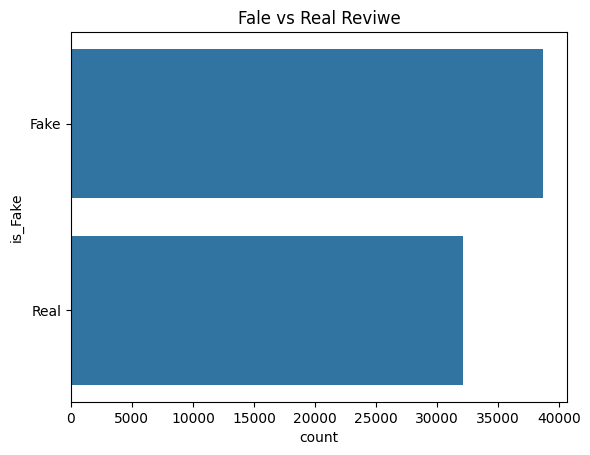

In [13]:
sns.countplot(df['is_Fake'])
plt.title('Fale vs Real Reviwe')
plt.plot()

In [14]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))  # Changed variable name to stop_words

def preprocess_text(text):
    text = re.sub(r'[^\w\s]','',text).lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)


df['cleaned_text'] = df['reviews.text'].apply(preprocess_text)

In [16]:
df.head()

,brand,manufacturer,reviews.didPurchase,reviews.rating,reviews.text,is_Fake,cleaned_text
0,Universal Music,Universal Music Group / Cash Money,Not Available,5,i love this album. it's very good. more to the...,Fake,love album good hip hop side current pop sound...
1,Lundberg,Lundberg,True,5,Good flavor. This review was collected as part...,Real,good flavor review collect part promot
2,Lundberg,Lundberg,True,5,Good flavor.,Real,good flavor
3,K-Y,K-Y,False,1,I read through the reviews on here before look...,Real,read review look buy one coupl lubric ultim di...
4,K-Y,K-Y,False,1,My husband bought this gel for us. The gel cau...,Real,husband bought gel u gel caus irrit felt like ...


In [17]:
# filter fake review
fake_reviews = df[df['is_Fake'] == 'Fake']
x_fake = fake_reviews['cleaned_text']
y_fake = fake_reviews['reviews.rating'].map({1:'Negative', 2:'Negative', 3:'Neutral', 4:'Positive', 5:'positive'})

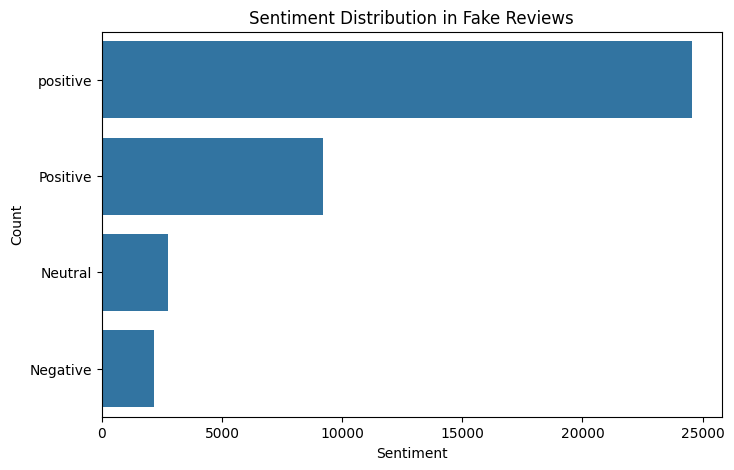

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(y_fake)
plt.title('Sentiment Distribution in Fake Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

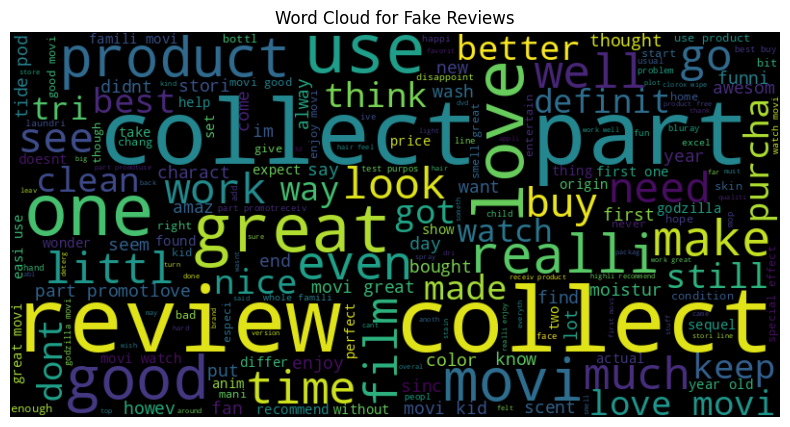

In [19]:
!pip install wordcloud # Install the wordcloud package

# Import the WordCloud class from the wordcloud module
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# ... (your existing code) ...

#Generate word cloud for fake review
fake_reviews_text = ''.join(df[df['is_Fake'] == 'Fake']['cleaned_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_reviews_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake Reviews')
plt.show()

In [20]:
df.head()

,brand,manufacturer,reviews.didPurchase,reviews.rating,reviews.text,is_Fake,cleaned_text
0,Universal Music,Universal Music Group / Cash Money,Not Available,5,i love this album. it's very good. more to the...,Fake,love album good hip hop side current pop sound...
1,Lundberg,Lundberg,True,5,Good flavor. This review was collected as part...,Real,good flavor review collect part promot
2,Lundberg,Lundberg,True,5,Good flavor.,Real,good flavor
3,K-Y,K-Y,False,1,I read through the reviews on here before look...,Real,read review look buy one coupl lubric ultim di...
4,K-Y,K-Y,False,1,My husband bought this gel for us. The gel cau...,Real,husband bought gel u gel caus irrit felt like ...


In [21]:
x = df['cleaned_text']
vectorizer = TfidfVectorizer(max_features=5000)
x_tfidf = vectorizer.fit_transform(x)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['is_Fake'] = le.fit_transform(df['is_Fake'])
y = df['is_Fake']

In [23]:
df.head()

,brand,manufacturer,reviews.didPurchase,reviews.rating,reviews.text,is_Fake,cleaned_text
0,Universal Music,Universal Music Group / Cash Money,Not Available,5,i love this album. it's very good. more to the...,0,love album good hip hop side current pop sound...
1,Lundberg,Lundberg,True,5,Good flavor. This review was collected as part...,1,good flavor review collect part promot
2,Lundberg,Lundberg,True,5,Good flavor.,1,good flavor
3,K-Y,K-Y,False,1,I read through the reviews on here before look...,1,read review look buy one coupl lubric ultim di...
4,K-Y,K-Y,False,1,My husband bought this gel for us. The gel cau...,1,husband bought gel u gel caus irrit felt like ...


In [24]:
x = df.drop(['reviews.didPurchase', 'reviews.rating', 'reviews.text', 'is_Fake'], axis=1)
y = df['is_Fake']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['is_Fake'] = le.fit_transform(df['is_Fake'])
y = df['is_Fake']
# %%
df.head()
# %%
# Changes here: Convert 'brand' and 'manufacturer' to numerical using Label Encoding
brand_le = LabelEncoder()
manufacturer_le = LabelEncoder()
df['brand_encoded'] = brand_le.fit_transform(df['brand'])
df['manufacturer_encoded'] = manufacturer_le.fit_transform(df['manufacturer'])
#x = df[['brand_encoded', 'manufacturer_encoded']]  # Select the encoded features

# Drop the original string feature
x = df.drop(['reviews.didPurchase', 'reviews.rating', 'reviews.text', 'is_Fake', 'brand', 'manufacturer', 'cleaned_text'], axis=1) # Dropped 'cleaned_text' column


y = df['is_Fake']
# %%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# %%
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [27]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train, y_train)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc *100)

Accuracy_score 63.298998165655426


In [28]:
print("Classification_report:")
print(classification_report(y_test, y_pred))

Classification_report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      7741
           1       0.60      0.60      0.60      6433

    accuracy                           0.63     14174
   macro avg       0.63      0.63      0.63     14174
weighted avg       0.63      0.63      0.63     14174



<ipython-input-29-9bee01999f5d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='coolwarm')


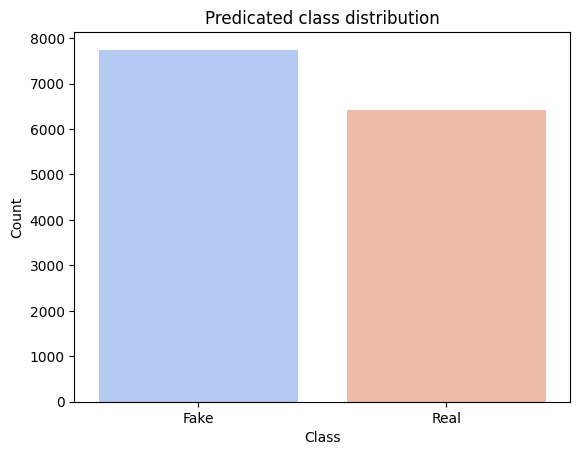

In [29]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Predicated class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
ran = RandomForestClassifier()
ran.fit(x_train, y_train)
y_pred = ran.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 88.40129815154508


In [32]:
# random forest prediction fake and real value count

pred_count = pd.Series(y_pred).value_counts()

print("Fake Count (0):", pred_count.get(0, 0))
print("Real Count (1):", pred_count.get(1, 0))

Fake Count (0): 6595
Real Count (1): 7579


In [33]:
print("Classification_report:")
print(classification_report(y_test, y_pred))

Classification_report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      7741
           1       0.82      0.96      0.88      6433

    accuracy                           0.88     14174
   macro avg       0.89      0.89      0.88     14174
weighted avg       0.90      0.88      0.88     14174



<ipython-input-34-fc772c2dd639>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='coolwarm')


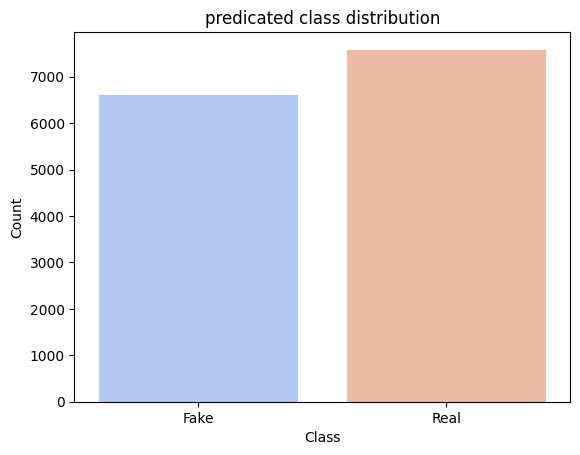

In [34]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('predicated class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

In [35]:
from sklearn.svm import SVC

In [36]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)  # Changed to predict instead of fit
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 80.0973613658812


In [37]:
pred_count = pd.Series(y_pred).value_counts()

print("Fake Count (0):", pred_count.get(0, 0))
print("Real Count (1):", pred_count.get(1, 0))

Fake Count (0): 6034
Real Count (1): 8140


In [38]:
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      7741
           1       0.72      0.91      0.81      6433

    accuracy                           0.80     14174
   macro avg       0.81      0.81      0.80     14174
weighted avg       0.82      0.80      0.80     14174



<ipython-input-39-cf9038e98af4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='coolwarm')


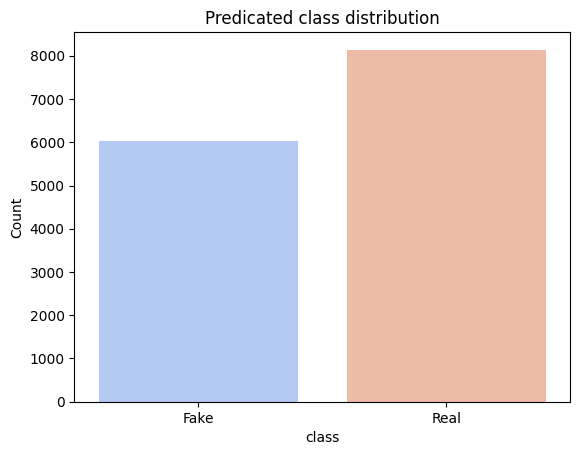

In [39]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Predicated class distribution')
plt.xlabel('class')
plt.ylabel('Count')
plt.xticks([0,1], ['Fake', 'Real'])
plt.show()

In [40]:
# Assuming you want to count 'Fake' and 'Real' values in the 'is_Fake' column:
print(df['is_Fake'].value_counts())

is_Fake
0    38711
1    32156
Name: count, dtype: int64


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dec = DecisionTreeClassifier(criterion='entropy', random_state=0)  # Changed 'entrophy' to 'entropy'
dec.fit(x_train, y_train)
y_pred = dec.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 88.40835332298575


In [43]:
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      7741
           1       0.82      0.96      0.88      6433

    accuracy                           0.88     14174
   macro avg       0.89      0.89      0.88     14174
weighted avg       0.90      0.88      0.88     14174



<ipython-input-44-9bee01999f5d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='coolwarm')


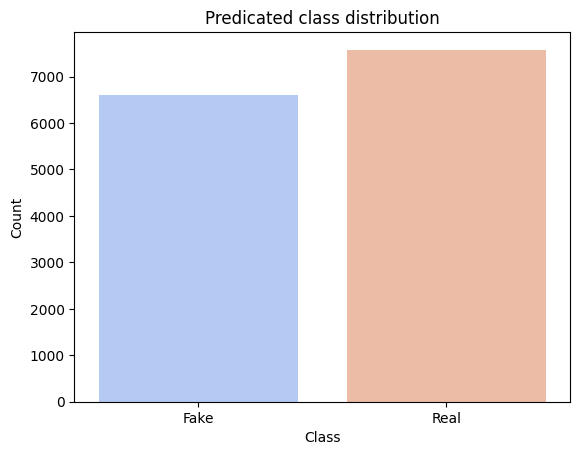

In [44]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Predicated class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

In [45]:
# Assuming you want to count 'Fake' and 'Real' values in the 'is_Fake' column:
print(df['is_Fake'].value_counts())

is_Fake
0    38711
1    32156
Name: count, dtype: int64


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
kne = KNeighborsClassifier()
kne.fit(x_train, y_train)
y_pred = kne.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 87.03259489205588


In [48]:
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      7741
           1       0.82      0.92      0.87      6433

    accuracy                           0.87     14174
   macro avg       0.87      0.87      0.87     14174
weighted avg       0.88      0.87      0.87     14174



<ipython-input-49-1751bfe1ede9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='coolwarm')


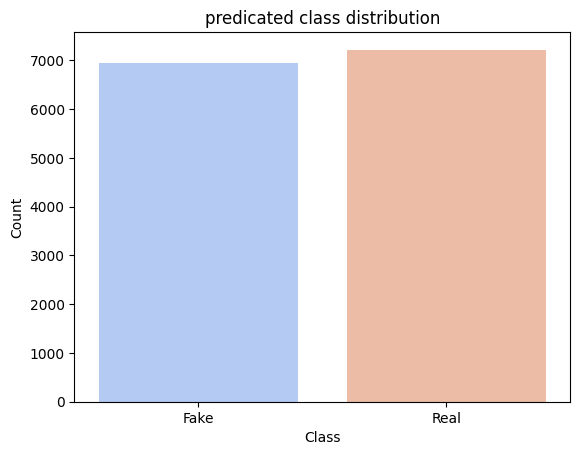

In [49]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('predicated class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1], ['Fake', 'Real'])
plt.show()

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
mul = MultinomialNB()
mul.fit(x_train, y_train)
y_pred = mul.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 59.83490898828842


In [52]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.66      0.64      7741
           1       0.56      0.53      0.54      6433

    accuracy                           0.60     14174
   macro avg       0.59      0.59      0.59     14174
weighted avg       0.60      0.60      0.60     14174



<ipython-input-53-b1c599eaa3b8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='coolwarm')


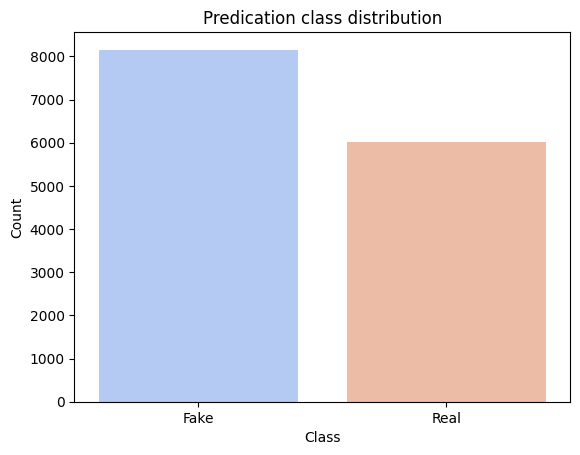

In [53]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Predication class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1], ['Fake', 'Real'])
plt.show()

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
gra = GradientBoostingClassifier()
gra.fit(x_train, y_train)
y_pred = gra.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy_score', acc * 100)

Accuracy_score 85.91082263298998


In [56]:
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      7741
           1       0.78      0.95      0.86      6433

    accuracy                           0.86     14174
   macro avg       0.87      0.87      0.86     14174
weighted avg       0.88      0.86      0.86     14174



<ipython-input-57-f71d02b9b2c7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='coolwarm')


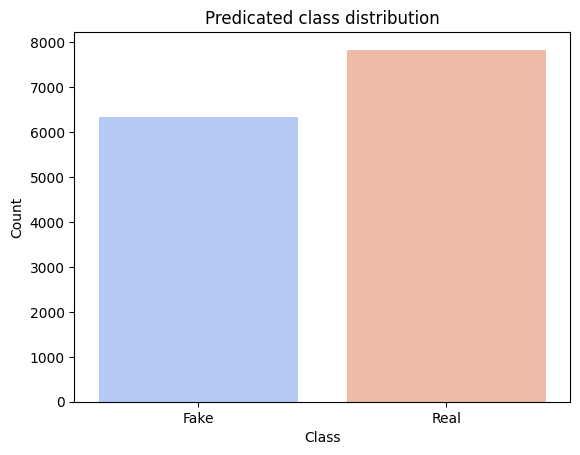

In [57]:
sns.countplot(x=y_pred, palette='coolwarm')
plt.title('Predicated class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1], ['Fake', 'Real'])
plt.show()

In [58]:
import pickle

In [59]:
with open('amazon.pkl', 'wb') as file:
    pickle.dump(dec, file)

In [60]:
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [61]:
real_reviews = df[df['is_Fake'] == 1]
real_reviews.to_csv('real_reviews.csv', index = False)
print("Real reviews save to real_reviews.csv")

Real reviews save to real_reviews.csv


In [62]:
real_reviews.head()

,brand,manufacturer,reviews.didPurchase,reviews.rating,reviews.text,is_Fake,cleaned_text,brand_encoded,manufacturer_encoded
1,Lundberg,Lundberg,True,5,Good flavor. This review was collected as part...,1,good flavor review collect part promot,190,228
2,Lundberg,Lundberg,True,5,Good flavor.,1,good flavor,190,228
3,K-Y,K-Y,False,1,I read through the reviews on here before look...,1,read review look buy one coupl lubric ultim di...,164,183
4,K-Y,K-Y,False,1,My husband bought this gel for us. The gel cau...,1,husband bought gel u gel caus irrit felt like ...,164,183
5,K-Y,K-Y,False,1,My boyfriend and I bought this to spice things...,1,boyfriend bought spice thing bedroom highli di...,164,183


In [63]:
real_reviews.isnull().sum()

,0
brand,0
manufacturer,0
reviews.didPurchase,0
reviews.rating,0
reviews.text,0
is_Fake,0
cleaned_text,0
brand_encoded,0
manufacturer_encoded,0


In [64]:
real_reviews.shape

(32156, 9)

<ipython-input-65-cdec90afbc35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_reviews['Sentiment'] = real_reviews['reviews.rating'].map({1:'Negative', 2:'Negative', 3:'Netural', 4:'Positive', 5:'Positive'})
<ipython-input-65-cdec90afbc35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=real_reviews['Sentiment'], palette='coolwarm')


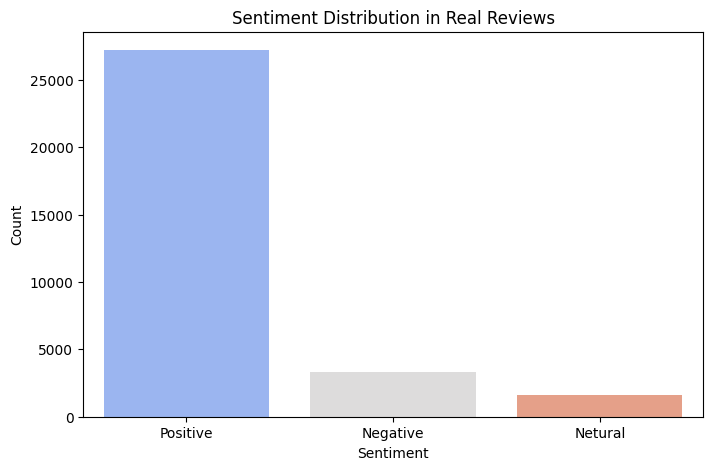

In [65]:
# maping reviews rating sentiment analysis

real_reviews['Sentiment'] = real_reviews['reviews.rating'].map({1:'Negative', 2:'Negative', 3:'Netural', 4:'Positive', 5:'Positive'})

plt.figure(figsize=(8,5))
sns.countplot(x=real_reviews['Sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution in Real Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-66-c17ee84e7080>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_reviews['Sentiment'] = real_reviews['reviews.rating'].map({1:'Negative', 2:'Negative', 3:'Neutral', 4:'Positive', 5:'Positive'})


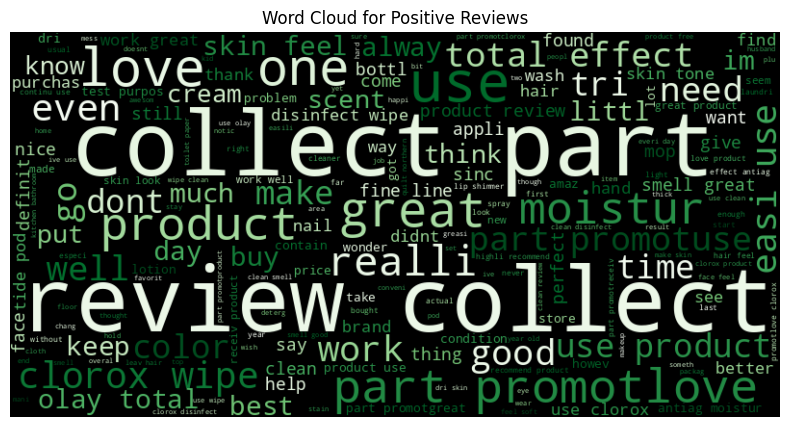

In [66]:
# word cloude for positive reviews

# Ensure 'Sentiment' column has 'Positive' values (case-sensitive)
real_reviews['Sentiment'] = real_reviews['reviews.rating'].map({1:'Negative', 2:'Negative', 3:'Neutral', 4:'Positive', 5:'Positive'})

positive_text = ''.join(real_reviews[real_reviews['Sentiment'] == 'Positive']['cleaned_text']) # Changed 'positive' to 'Positive'
wordcloud_positive = WordCloud(width=800, height=400, background_color='black', colormap='Greens').generate(positive_text) # Changed 'blak' to 'black'

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

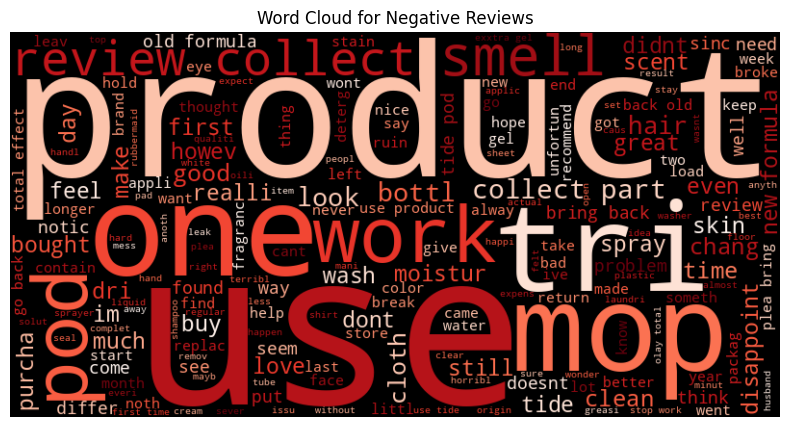

In [67]:
# word cloud for negative review
negative_text = ''.join(real_reviews[real_reviews['Sentiment'] == 'Negative']['cleaned_text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

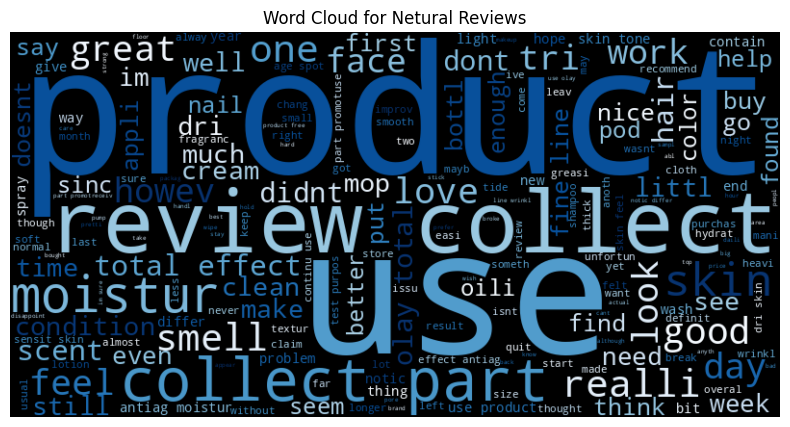

In [68]:
# word cloud for netural review

netural_text = ''.join(real_reviews[real_reviews['Sentiment'] == 'Neutral']['cleaned_text'])
wordcloud_netural = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(netural_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_netural, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Netural Reviews')
plt.show()

In [69]:
print(df['reviews.text'].value_counts())

reviews.text
Good                                                                                                            26
Great                                                                                                           25
good                                                                                                            18
Great product                                                                                                   17
Excellent                                                                                                       14
                                                                                                                ..
Godzilla is a great movie.cant wait for remake to come following Kong                                            1
I can't wait for the sequel to the movie with King Kong :)                                                       1
Love this movie!!! Big fan of the classic Godzilla!!!              

In [70]:
real_reviews.to_csv("real_reviews_with_sentiment.csv", index=False)
print("Real reviews with sentiment analysis saved to real_reviews_with_sentiment.csv")


Real reviews with sentiment analysis saved to real_reviews_with_sentiment.csv


In [71]:
real_reviews.head()

,brand,manufacturer,reviews.didPurchase,reviews.rating,reviews.text,is_Fake,cleaned_text,brand_encoded,manufacturer_encoded,Sentiment
1,Lundberg,Lundberg,True,5,Good flavor. This review was collected as part...,1,good flavor review collect part promot,190,228,Positive
2,Lundberg,Lundberg,True,5,Good flavor.,1,good flavor,190,228,Positive
3,K-Y,K-Y,False,1,I read through the reviews on here before look...,1,read review look buy one coupl lubric ultim di...,164,183,Negative
4,K-Y,K-Y,False,1,My husband bought this gel for us. The gel cau...,1,husband bought gel u gel caus irrit felt like ...,164,183,Negative
5,K-Y,K-Y,False,1,My boyfriend and I bought this to spice things...,1,boyfriend bought spice thing bedroom highli di...,164,183,Negative


In [72]:
real_reviews['Sentiment'].value_counts()

,count
Sentiment,
Positive,27220
Negative,3341
Neutral,1595


In [73]:
# Ensure the 'reviews.text' column exists
if 'reviews.text' not in real_reviews.columns:  # Changed real_data to real_reviews
    raise ValueError("The dataset does not contain the 'reviews.text' column.")

In [74]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [76]:
# function to text preprocessing

def preprocess_text(text):
    text = re.sub(r'[^\w\s]','',text).lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ''.join(tokens)

In [77]:
# Assuming you want to work with the real_reviews DataFrame
real_reviews['cleaned_text'] = real_reviews['reviews.text'].apply(preprocess_text)

<ipython-input-77-c0beed854d24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_reviews['cleaned_text'] = real_reviews['reviews.text'].apply(preprocess_text)


In [78]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
# Changed 'real_data' to 'real_reviews' to access the 'cleaned_text' column
real_data_tfidf = vectorizer.fit_transform(real_reviews['cleaned_text'])

In [79]:
df1 = pd.read_csv('/content/real_reviews_with_sentiment.csv')

In [80]:
df.head()

,brand,manufacturer,reviews.didPurchase,reviews.rating,reviews.text,is_Fake,cleaned_text,brand_encoded,manufacturer_encoded
0,Universal Music,Universal Music Group / Cash Money,Not Available,5,i love this album. it's very good. more to the...,0,love album good hip hop side current pop sound...,361,423
1,Lundberg,Lundberg,True,5,Good flavor. This review was collected as part...,1,good flavor review collect part promot,190,228
2,Lundberg,Lundberg,True,5,Good flavor.,1,good flavor,190,228
3,K-Y,K-Y,False,1,I read through the reviews on here before look...,1,read review look buy one coupl lubric ultim di...,164,183
4,K-Y,K-Y,False,1,My husband bought this gel for us. The gel cau...,1,husband bought gel u gel caus irrit felt like ...,164,183


In [81]:
# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(real_data_tfidf.toarray(), columns=vectorizer.get_feature_names_out())


In [82]:
# Label Encoding for categorical columns ('brand', 'manufacturer')
label_encoders = {}
for col in ['brand', 'manufacturer']:
    # Changed real_data to real_reviews
    if col in real_reviews.columns:
        le = LabelEncoder()
        real_reviews[col] = le.fit_transform(real_reviews[col].astype(str))
        label_encoders[col] = le

<ipython-input-82-14ca1333a6d3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_reviews[col] = le.fit_transform(real_reviews[col].astype(str))
<ipython-input-82-14ca1333a6d3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_reviews[col] = le.fit_transform(real_reviews[col].astype(str))


In [83]:
sentiment_mapping = {
    1: 'Negative',
    2: 'Negative',
    3: 'Neutral',
    4: 'Positive',
    5: 'Positive'
}

# Use 'real_reviews' DataFrame (which contains the 'reviews.rating' column)
real_reviews['sentiment'] = real_reviews['reviews.rating'].map(sentiment_mapping)

<ipython-input-83-d5cfb2defa3a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_reviews['sentiment'] = real_reviews['reviews.rating'].map(sentiment_mapping)


In [84]:
# Change 1: Use the correct encoded column names in pd.concat for 'brand' and 'manufacturer'
# Change 2: Use real_reviews instead of real_data (since it has the sentiment column)

# Assuming 'real_data' is the DataFrame where you did label encoding:
final_data = pd.concat([real_reviews[['brand', 'manufacturer', 'sentiment']], tfidf_df], axis=1)  # Changed real_data to real_reviews

In [85]:
final_data.to_csv("real_reviews_processed.csv", index=False)
print("Processed real reviews saved to 'real_reviews_processed.csv'.")

Processed real reviews saved to 'real_reviews_processed.csv'.


In [86]:
# Display first few rows
final_data.head()

,brand,manufacturer,sentiment,10nexuproductsitfrontrightknowelsewherthoughtsomethgohairpossiblagediethealthissuwasntsureresearchnexuproductrealizthathairbecomdribrittlnoticsmelldifferseenonegoodreviewseencustomservicreplipostwouldplearepliexplanposteveryonseewastlotmoneymaniargumenthusbandmoneyseeright,10useplastichandlkeeppoploolockpositnoticbuttontopdontknowgetravereviewgoodnextopenmademetalmaybplastichandl,10yearagobeganuseregeneristwantsofteryoungerlookskinalsolargbrownspotsidefacesundamagboughtcreamuseeverydaywithsixtenmonthlargbrownspotdisappearhappiaviduserolayproductreviewcollectpartpromot,10yearusertruliconfuswouldchangformulatherclearlinothbetterfeelscentnewformulaisearchnewoptiongivenpricepointefficacinewformulanexulongeroptionhopbringbackoldformulaandback,112yearoldlovechoochoosoulfreaksoonhearwhistllikedvdbettercd10cantbeatgetmaybjamchoochoosoulcarsometim,11montholdfussitwodaycoldcoughhasntsleeprubbabivickchestquitcoughfellasleeplifesaversleepdeprivmomma,11yearolddaughterlovelipshimmerproductsheercolornicemoistureffectdoesntmelthotcareitherreviewcollectpartpromot,...,youngchildconveniusecloroxwipecleanmessreviewcollectpartpromot,youngchildkeepthingsanitarisimplhugeprioritireviewcollectpartpromot,youngchildthinkproductexcelkeepgermbay,youngernonprofitworkhomelessworkpoorveteranfamilialsogiveassistnaturmanmaddisaststrictliusevarietilysoltoiletbowlcleanerlysolbathroomcleanerlysolsanitspraylysoldisinfectwipeconsistbasiapprecicomfortknowlysolbrandproductsupposalsoworthlittlextrapiecmindreallilovesmellbathroombathroomcleanerlingersmellfreshthankmakeexcelproduct,youngestdaughterneuromusculardiseasrealliimportukeephousfreegermpossiblcloroxdisinfectwipeworkwellhelpsavetime,younggirlremembmomuseeraliquiddetergclothdetergwouldgetgreasoilstaindadworkuniformlongdayworkdieselmechangrewwentcollegswitchdetergroommatuseneverimpressresultlaterlifeswitchbrandbranddependsalealwayaddpowderoxicleantowelwhitegetcleanrecentstoreranacrosseraoxiboosterlaundrideterggetclothcleanleavsmellfreshevenmuchmonthlatermomknewwork,youngkidalwayconcerngermhomeloveusecloroxproductknowgetnicelemonsmellwelldisinfectreviewcollectpartpromot,youngkidmustusedoorknobfaucetdoorpullanywherlotfingerprintfound,yum,yummi
1,125.0,145.0,Positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,125.0,145.0,Positive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105.0,114.0,Negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,105.0,114.0,Negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,105.0,114.0,Negative,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
final_data['sentiment'].value_counts()

,count
sentiment,
Positive,27220
Negative,3341
Neutral,1595


<ipython-input-88-00de9af47f57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=real_reviews['Sentiment'], palette='coolwarm')


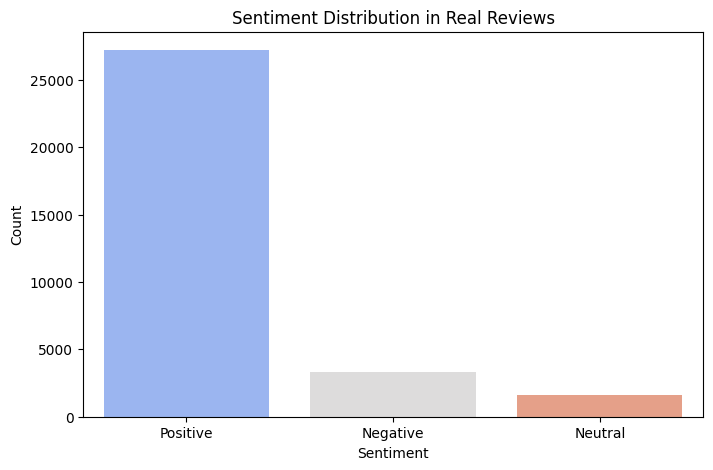

In [88]:

plt.figure(figsize=(8,5))
sns.countplot(x=real_reviews['Sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution in Real Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [89]:
x = final_data.drop(['sentiment','manufacturer','brand'], axis=1)
y = final_data['sentiment']

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:
def prepare_fake_real_classification(df):
    # Create encoded columns for brand and manufacturer
    le_brand = LabelEncoder()
    le_manufacturer = LabelEncoder()

    # Create feature matrix X
    X = pd.DataFrame()
    X['brand_encoded'] = le_brand.fit_transform(df['brand'])
    X['manufacturer_encoded'] = le_manufacturer.fit_transform(df['manufacturer'])

    # Create target variable y
    y = df['is_Fake']

    # Handle any missing values
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    return X, y

In [92]:
def inspect_data(df):
    print("DataFrame Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    return df

In [93]:
print(final_data.head())
print(final_data.columns)

   brand  manufacturer sentiment  \
1  125.0         145.0  Positive   
2  125.0         145.0  Positive   
3  105.0         114.0  Negative   
4  105.0         114.0  Negative   
5  105.0         114.0  Negative   

   10nexuproductsitfrontrightknowelsewherthoughtsomethgohairpossiblagediethealthissuwasntsureresearchnexuproductrealizthathairbecomdribrittlnoticsmelldifferseenonegoodreviewseencustomservicreplipostwouldplearepliexplanposteveryonseewastlotmoneymaniargumenthusbandmoneyseeright  \
1                                                0.0                                                                                                                                                                                                                                   
2                                                0.0                                                                                                                                                                           

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def clean_and_prepare_data(df):
    """
    Clean and prepare the data for sentiment analysis with NA handling
    """
    # Create a clean copy
    cleaned_df = df.copy()

    # Check for NA values
    print("\nNA values before cleaning:")
    print(cleaned_df.isnull().sum())

    # Fill NA values with the most frequent value in each column
    cleaned_df['brand'] = cleaned_df['brand'].fillna(cleaned_df['brand'].mode()[0])
    cleaned_df['manufacturer'] = cleaned_df['manufacturer'].fillna(cleaned_df['manufacturer'].mode()[0])

    print("\nNA values after cleaning:")
    print(cleaned_df.isnull().sum())

    # Convert float columns to int for categorical variables
    cleaned_df['brand'] = cleaned_df['brand'].astype(int)
    cleaned_df['manufacturer'] = cleaned_df['manufacturer'].astype(int)

    # Create feature matrix
    X = pd.DataFrame({
        'brand': cleaned_df['brand'],
        'manufacturer': cleaned_df['manufacturer']
    })

    # Create Label Encoder for sentiment
    le = LabelEncoder()
    y = le.fit_transform(cleaned_df['sentiment'])

    print("\nFeature matrix shape:", X.shape)
    print("Unique sentiments:", le.classes_)

    return X, y

def train_sentiment_classifier(X, y):
    """
    Train and evaluate the sentiment classifier
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Initialize and train the model
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print results
    print("\nModel Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model

# Main execution
def main(final_data):
    print("Step 1: Data Information")
    print("Original data shape:", final_data.shape)

    # Data validation
    print("\nData types before processing:")
    print(final_data.dtypes)

    print("\nValue counts for sentiment:")
    print(final_data['sentiment'].value_counts())

    print("\nStep 2: Cleaning and Preparing Data")
    X, y = clean_and_prepare_data(final_data)

    print("\nStep 3: Training Model")
    model = train_sentiment_classifier(X, y)

    return model, X, y

# Usage example
if __name__ == "__main__":
    try:
        # Keep only necessary columns
        columns_to_keep = ['brand', 'manufacturer', 'sentiment']
        final_data = final_data[columns_to_keep]

        # Train model
        model, X, y = main(final_data)

        print("\nSuccess! Model is ready for predictions.")

        # Save the model and feature information
        import pickle
        with open('sentiment_model.pkl', 'wb') as f:
            pickle.dump({'model': model, 'feature_names': X.columns}, f)

    except Exception as e:
        print(f"Error occurred: {str(e)}")

        # Print detailed information about the data
        print("\nDetailed data information:")
        print(final_data.info())
        print("\nSample of the data:")
        print(final_data.head())

Step 1: Data Information
Original data shape: (47247, 3)

Data types before processing:
brand           float64
manufacturer    float64
sentiment        object
dtype: object

Value counts for sentiment:
sentiment
Positive    27220
Negative     3341
Neutral      1595
Name: count, dtype: int64

Step 2: Cleaning and Preparing Data

NA values before cleaning:
brand           15091
manufacturer    15091
sentiment       15091
dtype: int64

NA values after cleaning:
brand               0
manufacturer        0
sentiment       15091
dtype: int64

Feature matrix shape: (47247, 2)
Unique sentiments: ['Negative' 'Neutral' 'Positive' nan]

Step 3: Training Model

Model Performance:
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       633
           1       0.00      0.00      0.00       320
           2       0.79      0.61      0.69      5502
           3       0.57      1.00      0.73      2995

    accurac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [95]:
# Check data types and NA values
print(final_data.dtypes)
print(final_data.isnull().sum())

brand           float64
manufacturer    float64
sentiment        object
dtype: object
brand           15091
manufacturer    15091
sentiment       15091
dtype: int64


In [96]:
model, X, y = main(final_data)

Step 1: Data Information
Original data shape: (47247, 3)

Data types before processing:
brand           float64
manufacturer    float64
sentiment        object
dtype: object

Value counts for sentiment:
sentiment
Positive    27220
Negative     3341
Neutral      1595
Name: count, dtype: int64

Step 2: Cleaning and Preparing Data

NA values before cleaning:
brand           15091
manufacturer    15091
sentiment       15091
dtype: int64

NA values after cleaning:
brand               0
manufacturer        0
sentiment       15091
dtype: int64

Feature matrix shape: (47247, 2)
Unique sentiments: ['Negative' 'Neutral' 'Positive' nan]

Step 3: Training Model

Model Performance:
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       633
           1       0.00      0.00      0.00       320
           2       0.79      0.61      0.69      5502
           3       0.57      1.00      0.73      2995

    accurac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [97]:
def predict_sentiment(model, brand, manufacturer):
    """
    Make predictions on new data
    """
    X_new = pd.DataFrame({
        'brand': [int(brand)],
        'manufacturer': [int(manufacturer)]
    })

    prediction = model.predict(X_new)
    return prediction[0]

# Example usage:
brand = 125
manufacturer = 145
prediction = predict_sentiment(model, brand, manufacturer)
print(f"Predicted sentiment for brand {brand}, manufacturer {manufacturer}: {prediction}")

Predicted sentiment for brand 125, manufacturer 145: 2


In [98]:
print(final_data.dtypes)
print(final_data.isnull().sum())
print(final_data.head())

brand           float64
manufacturer    float64
sentiment        object
dtype: object
brand           15091
manufacturer    15091
sentiment       15091
dtype: int64
   brand  manufacturer sentiment
1  125.0         145.0  Positive
2  125.0         145.0  Positive
3  105.0         114.0  Negative
4  105.0         114.0  Negative
5  105.0         114.0  Negative


In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

def prepare_data(final_data):
    # Create feature matrix by selecting numerical columns
    # First encode categorical columns
    le = LabelEncoder()

    # Create copies of the columns to encode
    final_data = final_data.copy()
    final_data['brand_encoded'] = le.fit_transform(final_data['brand'].astype(str))
    final_data['manufacturer_encoded'] = le.fit_transform(final_data['manufacturer'].astype(str))

    # Select features (excluding original categorical columns and target)
    feature_columns = [col for col in final_data.columns
                      if col not in ['sentiment', 'manufacturer', 'brand']
                      and not final_data[col].dtype == 'O']

    X = final_data[feature_columns]

    # Encode target variable
    le_sentiment = LabelEncoder()
    y = le.fit_transform(final_data['sentiment'])

    return X, y

def train_random_forest(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_imputed, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test_imputed)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f'Accuracy Score: {accuracy * 100:.2f}%')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

    return rf_model, imputer, X_test, y_test, y_pred

# Main execution
# Assuming final_data is your DataFrame
X, y = prepare_data(final_data)
model, imputer, X_test, y_test, y_pred = train_random_forest(X, y)

# Example of how to make predictions on new data
def predict_sentiment(model, imputer, new_data):
    # Prepare new data (should have same columns as training data)
    new_data_imputed = imputer.transform(new_data)
    return model.predict(new_data_imputed)

Accuracy Score: 91.03%

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.37      0.45       633
           1       0.00      0.00      0.00       320
           2       0.89      0.98      0.93      5502
           3       1.00      1.00      1.00      2995

    accuracy                           0.91      9450
   macro avg       0.62      0.59      0.60      9450
weighted avg       0.87      0.91      0.89      9450



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [108]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)